# Load packages

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the training dataset

In [35]:
#df = pd.read_csv("../../data/training.csv", sep="\t") # Orginal Training Data
#df = pd.read_csv("../../data/processed/training_numeric_cleaned.csv", sep="\t") # Cleaned missing data
#df = pd.read_csv("../../data/processed/training_outlier_removed.csv", sep="\t") # Cleaned outlier data 
df = pd.read_csv("../../data/processed/training_winsorized.csv", sep="\t") # Winsorization
df.rename(columns={"FLownPassengers": "FlownPassengers"}, inplace=True)

print(df.columns.tolist())



['DepartureDate', 'DepartureYear', 'DepartureMonth', 'DepartureDay', 'FlightNumber', 'DepartureAirport', 'ArrivalAirport', 'Route', 'ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FlownPassengers', 'BagsCount', 'FlightBagsWeight']


# Display basic information about the dataset

In [36]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26800 entries, 0 to 26799
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DepartureDate     26800 non-null  object 
 1   DepartureYear     26800 non-null  int64  
 2   DepartureMonth    26800 non-null  int64  
 3   DepartureDay      26800 non-null  int64  
 4   FlightNumber      26800 non-null  int64  
 5   DepartureAirport  26800 non-null  object 
 6   ArrivalAirport    26800 non-null  object 
 7   Route             26800 non-null  object 
 8   ActualFlightTime  26800 non-null  int64  
 9   ActualTotalFuel   26800 non-null  int64  
 10  ActualTOW         26800 non-null  float64
 11  FlownPassengers   26800 non-null  float64
 12  BagsCount         26800 non-null  float64
 13  FlightBagsWeight  26800 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 2.9+ MB
None
       DepartureYear  DepartureMonth  DepartureDay  FlightNumber  \
coun

# Check for missing values

In [37]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 DepartureDate       0
DepartureYear       0
DepartureMonth      0
DepartureDay        0
FlightNumber        0
DepartureAirport    0
ArrivalAirport      0
Route               0
ActualFlightTime    0
ActualTotalFuel     0
ActualTOW           0
FlownPassengers     0
BagsCount           0
FlightBagsWeight    0
dtype: int64



# Histograms for numerical variables

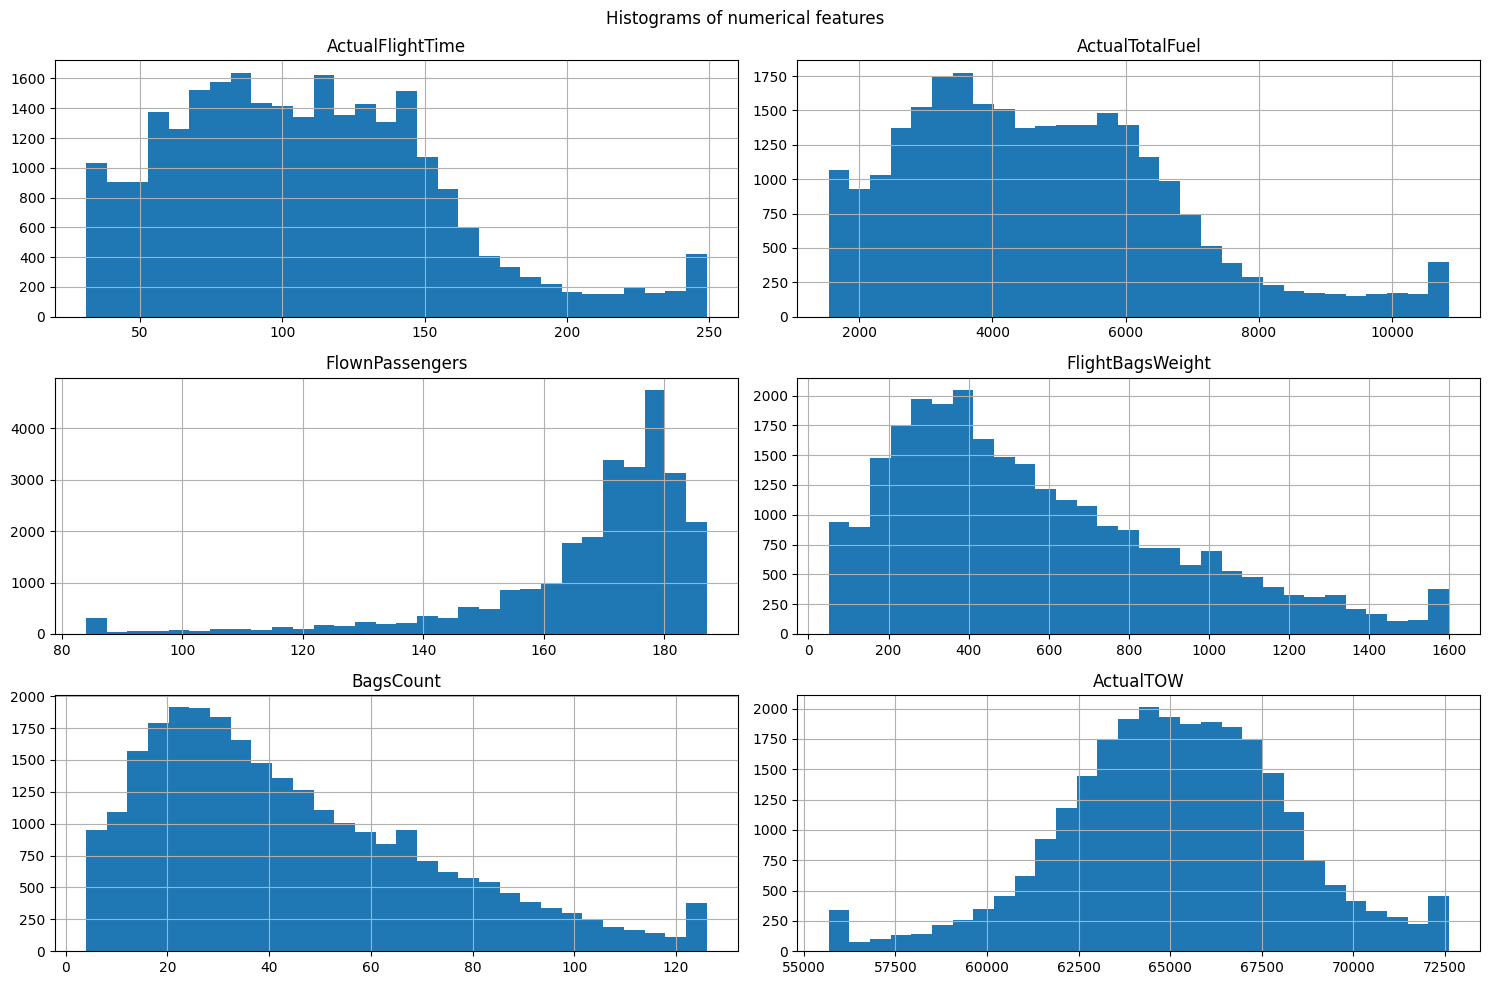

In [38]:
num_cols = ['ActualFlightTime', 'ActualTotalFuel', 'FlownPassengers', 'FlightBagsWeight', 'BagsCount', 'ActualTOW']
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of numerical features")
plt.tight_layout()
plt.show()


# Boxplots for detecting outliers

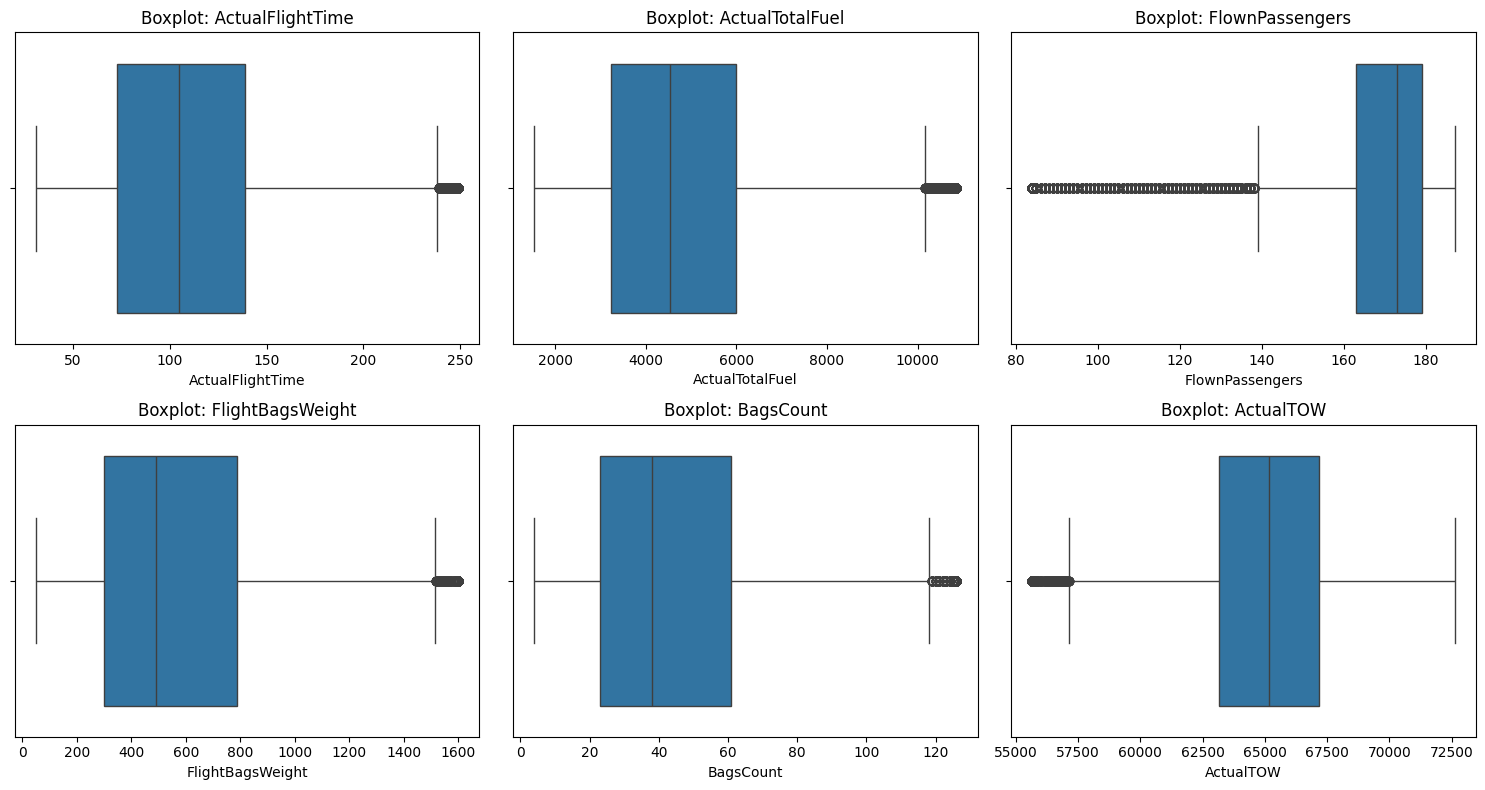

In [39]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


# Correlation heatmap

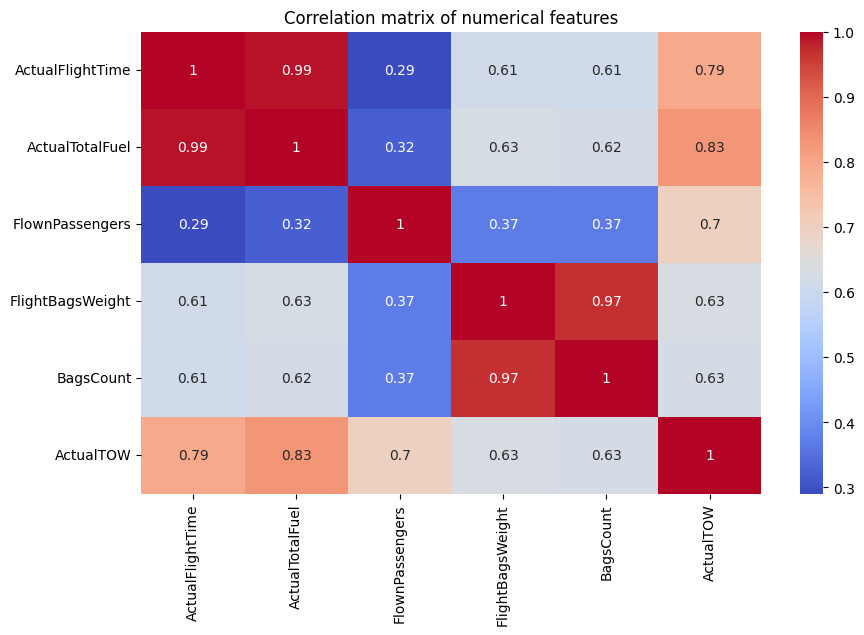

In [40]:
df.replace("(null)", np.nan, inplace=True)
num_cols = ['ActualFlightTime', 'ActualTotalFuel', 'FlownPassengers', 'FlightBagsWeight', 'BagsCount', 'ActualTOW']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

corr = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation matrix of numerical features")
plt.show()

# Scatter plot: Fuel consumption vs Take-Off Weight

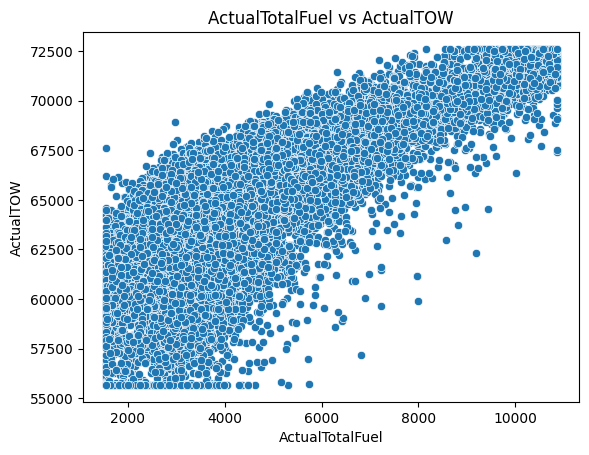

In [41]:
sns.scatterplot(x='ActualTotalFuel', y='ActualTOW', data=df)
plt.title("ActualTotalFuel vs ActualTOW")
plt.show()

# Scatter plot: Number of passengers vs Take-Off Weight

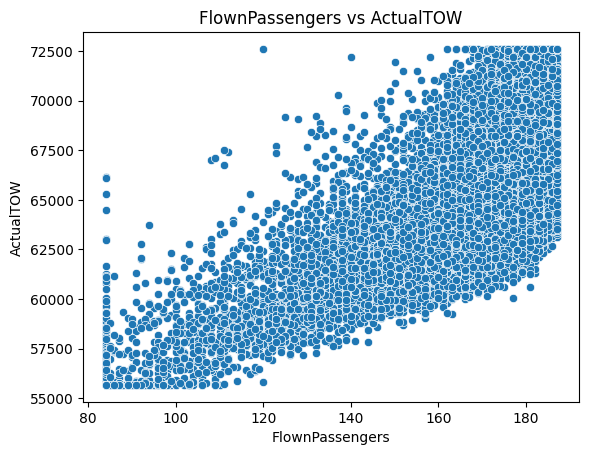

In [42]:
sns.scatterplot(x='FlownPassengers', y='ActualTOW', data=df)
plt.title("FlownPassengers vs ActualTOW")
plt.show()

# Scatter plot: Baggage weight vs Take-Off Weight

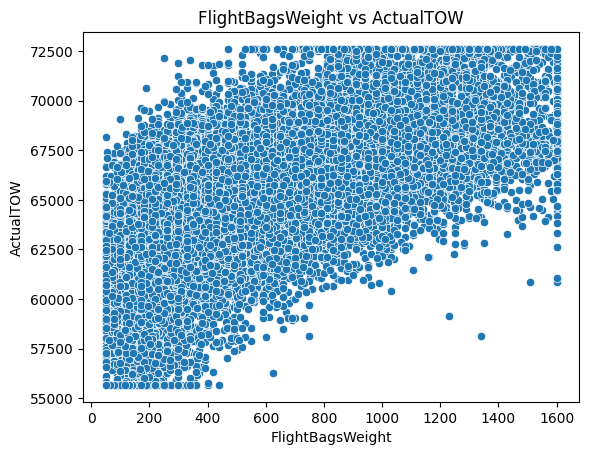

In [43]:
sns.scatterplot(x='FlightBagsWeight', y='ActualTOW', data=df)
plt.title("FlightBagsWeight vs ActualTOW")
plt.show()

# Number of flights per departure airport

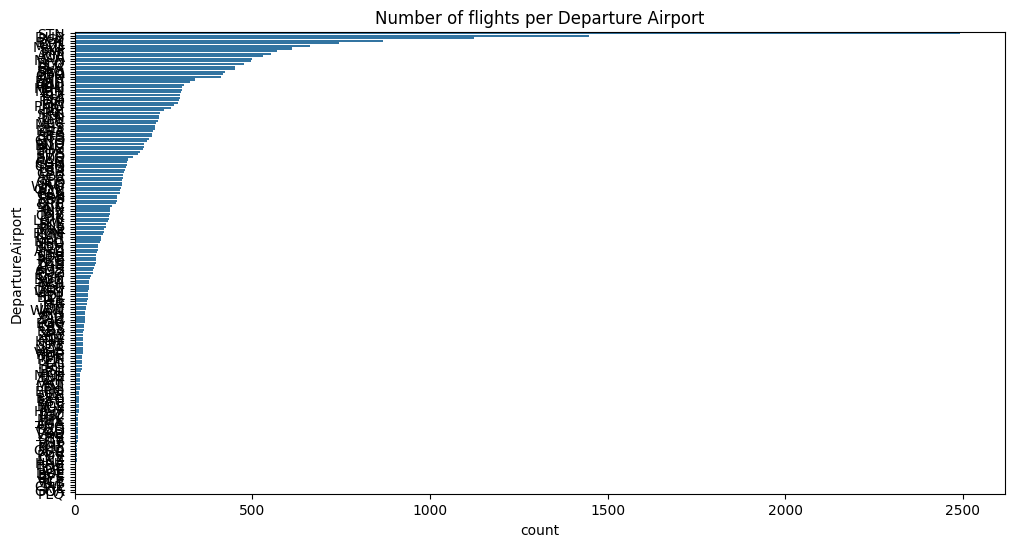

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(y='DepartureAirport', data=df, order=df['DepartureAirport'].value_counts().index)
plt.title("Number of flights per Departure Airport")
plt.show()